In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

# Step 1: Loading Labels

label_file_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/gas_label.csv"
labels_df = pd.read_csv(label_file_path)

# Step 2: Feature Extraction

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Remove the last layer of ResNet50 and use the output of the second last layer as features
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Define a function to extract features from images
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()


94765736/94765736 [==============================] - 1s 0us/step


In [3]:
# Step 3: Data Labeling

# Merge labels with image paths
data = []
for index, row in labels_df.iterrows():
    experiment_name = row['Experiment Number']
    bg_flow = row['Background Flow (m3/h)']
    GVF = row['GVF(%)']
    folder_path = os.path.join("/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oilandgas", experiment_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = extract_features(img_path)
        data.append([experiment_name, bg_flow, GVF, img_path] + features.tolist())


1/1 [==============================] - 0s 199ms/step


In [4]:
# Create DataFrame
columns = ['Experiment Number', 'Background Flow', 'GVF', 'Image Path'] + [f'feature_{i}' for i in range(100352)]
df = pd.DataFrame(data, columns=columns)

In [5]:
df.head()

,Experiment Number,Background Flow,GVF,Image Path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_100342,feature_100343,feature_100344,feature_100345,feature_100346,feature_100347,feature_100348,feature_100349,feature_100350,feature_100351
0,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.959164,-1.236315,-2.767065,-2.506173,-2.264353,-2.813304,...,-0.353816,-3.857638,-3.383975,-3.386235,-1.089734,-3.005149,-0.417632,-0.999690,0.288345,0.190216
1,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-2.064358,-0.751583,-2.569712,-2.512711,-2.287673,-2.437328,...,2.417429,-3.862293,-3.105885,-3.119642,-1.063144,-2.829449,-0.770123,-1.184565,-0.424480,-0.987750
2,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.142110,-1.209453,-1.880712,-3.335132,-2.925898,-1.982902,...,-1.974985,-4.053854,-2.793801,-2.648840,-0.563579,-2.899916,-1.057496,-1.446549,-1.896545,-1.698879
3,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-2.066426,-1.375807,-2.638491,-3.078293,-2.085697,-2.660204,...,-0.793696,-3.429162,-2.801962,-2.829513,-1.008091,-2.631681,-1.435795,-1.342129,-0.544478,-1.833681
4,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.851353,-1.289432,-2.037345,-2.510273,-2.672760,-2.705163,...,0.008680,-3.484021,-3.325639,-2.950909,-0.932931,-3.169971,-0.823567,-1.393958,-1.096081,-0.713142


In [6]:
df

,Experiment Number,Background Flow,GVF,Image Path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_100342,feature_100343,feature_100344,feature_100345,feature_100346,feature_100347,feature_100348,feature_100349,feature_100350,feature_100351
0,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.959164,-1.236315,-2.767065,-2.506173,-2.264353,-2.813304,...,-0.353816,-3.857638,-3.383975,-3.386235,-1.089734,-3.005149,-0.417632,-0.999690,0.288345,0.190216
1,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-2.064358,-0.751583,-2.569712,-2.512711,-2.287673,-2.437328,...,2.417429,-3.862293,-3.105885,-3.119642,-1.063144,-2.829449,-0.770123,-1.184565,-0.424480,-0.987750
2,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.142110,-1.209453,-1.880712,-3.335132,-2.925898,-1.982902,...,-1.974985,-4.053854,-2.793801,-2.648840,-0.563579,-2.899916,-1.057496,-1.446549,-1.896545,-1.698879
3,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-2.066426,-1.375807,-2.638491,-3.078293,-2.085697,-2.660204,...,-0.793696,-3.429162,-2.801962,-2.829513,-1.008091,-2.631681,-1.435795,-1.342129,-0.544478,-1.833681
4,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.851353,-1.289432,-2.037345,-2.510273,-2.672760,-2.705163,...,0.008680,-3.484021,-3.325639,-2.950909,-0.932931,-3.169971,-0.823567,-1.393958,-1.096081,-0.713142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,0.491000,-1.626504,-1.447273,0.494770,-2.115319,-1.825499,...,5.899130,-3.565800,-3.000773,-2.518421,-3.473357,-2.949421,-1.288291,4.133630,-1.605738,-2.738884
90,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-0.903900,-1.641101,-1.206692,1.328989,-3.238273,-1.249676,...,-1.038326,-3.616591,-3.151088,-2.894165,-2.384074,-2.576843,0.243736,3.213959,-1.894550,-2.256679
91,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-0.456572,-1.847560,-1.248999,-1.020298,-2.487698,-1.818065,...,0.922228,-3.535613,-2.713391,-3.111336,-2.333300,-2.455537,-0.630052,1.870315,-1.668059,-2.746398
92,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,0.495824,-2.515932,-1.498555,-1.879481,-1.943004,-1.516879,...,3.601013,-3.704717,-3.181305,-2.670912,-2.972676,-2.938800,0.631546,2.724636,-1.396334,-2.393586


In [7]:
y_bg_flow = df['Background Flow']  # Background Flow
y_WaterCut = df['GVF']  # GVF

In [8]:
# Split features and target variables
X = df.drop(columns=["Experiment Number", 'Background Flow', 'GVF', 'Image Path'])  # Excluding target variables only
y = df[['Background Flow', 'GVF']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a regression model (example: RandomForestRegressor)
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

# Predictions for test set
predictions = reg_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [10]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 7.078157894736842
Mean Squared Error (MSE): 76.55662368421052
R-squared (R2) Score: 0.7168238748293404


In [11]:
predictions

array([[13.  , 38.32],
       [ 9.  , 12.15],
       [22.  ,  6.72],
       [15.25, 17.02],
       [ 7.25,  6.78],
       [12.75, 25.26],
       [14.5 , 34.59],
       [25.25, 10.98],
       [ 9.  ,  6.56],
       [ 7.5 , 55.62],
       [22.5 , 44.38],
       [16.75, 33.88],
       [23.  , 46.34],
       [23.  , 21.03],
       [ 7.25,  6.38],
       [ 9.25, 11.03],
       [10.25, 12.  ],
       [15.5 , 26.32],
       [25.25, 11.4 ]])

In [12]:
import math
# Function to predict Background Flow and GVF for a single image
def predict_values_for_image(img_path):
    # Extract features from the image
    features = extract_features(img_path)

    # Reshape the features to match the input shape expected by the model
    features = features.reshape(1, -1)

    # Predict Background Flow and WaterCut values
    flow_rate_prediction = reg_model.predict(features)

    return flow_rate_prediction[0][0], flow_rate_prediction[0][1]

In [13]:
# Example usage
new_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oilandgas/be22004_004/16_02_2022_09_40_23_00_hdf5.png"
bg_flow_pred, GVF_pred = predict_values_for_image(new_image_path)

print("Predicted Background Flow:", math.ceil(bg_flow_pred))
print("Predicted GVF:", math.ceil(GVF_pred))


1/1 [==============================] - 0s 194ms/step
Predicted Background Flow: 8
Predicted GVF: 56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


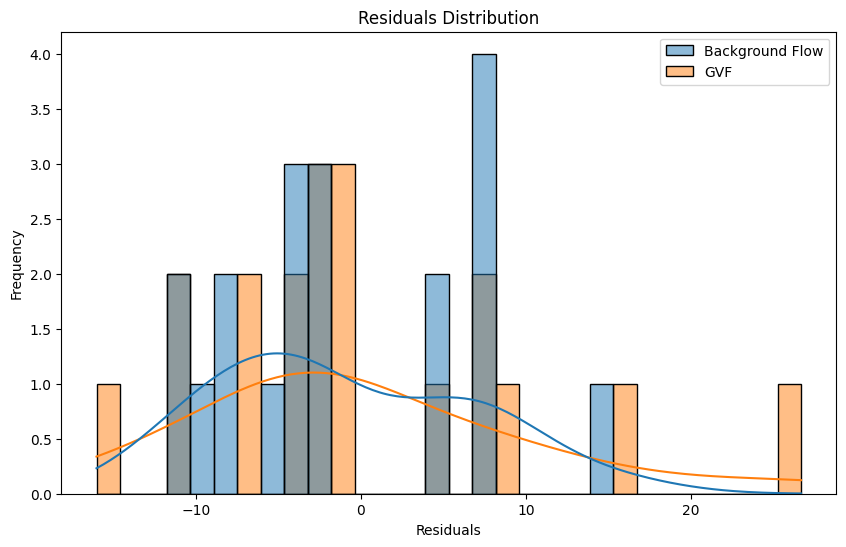

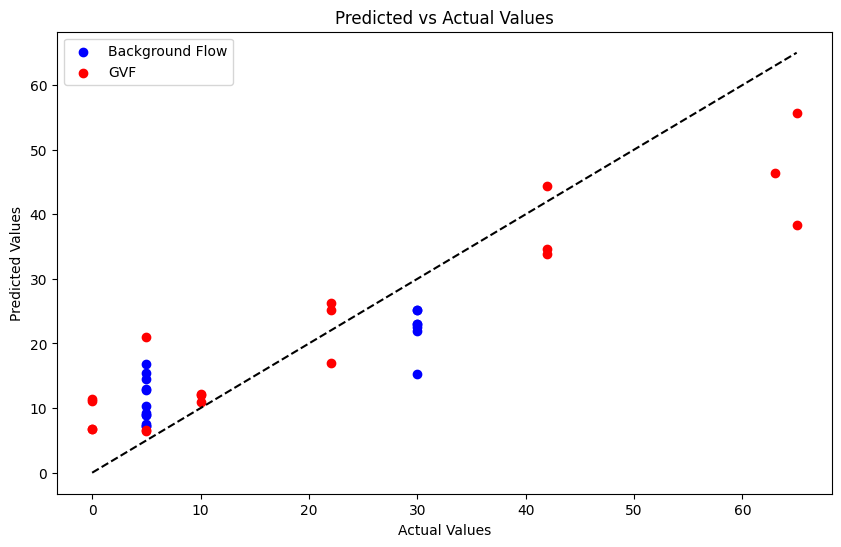

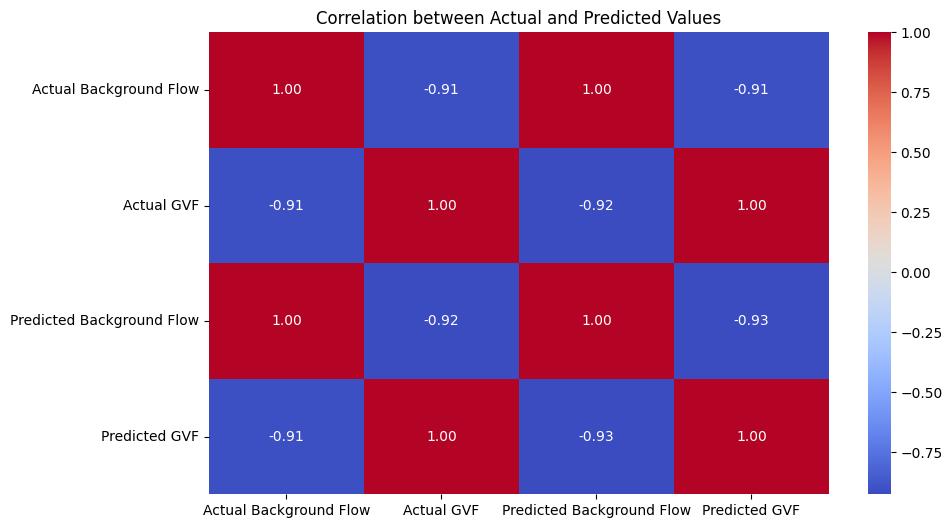

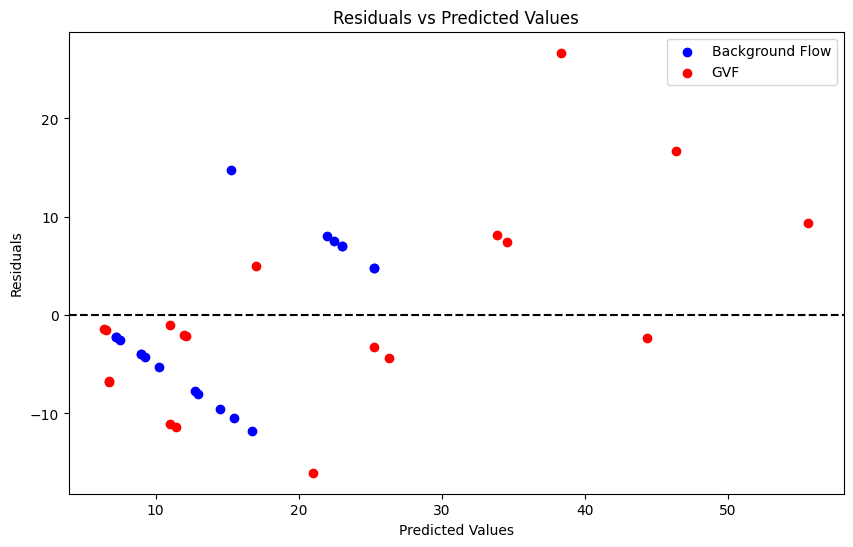

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Background Flow'], predictions[:, 0], color='blue', label='Background Flow')
plt.scatter(y_test['GVF'], predictions[:, 1], color='red', label='GVF')
plt.plot([0, max(max(y_test['Background Flow']), max(y_test['GVF']))], [0, max(max(y_test['Background Flow']), max(y_test['GVF']))], color='black', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))

# Add a small value to the diagonal of the covariance matrix
epsilon = 1e-9
cov_matrix = np.cov(np.concatenate((y_test, predictions), axis=1), rowvar=False)
# Compute the correlation matrix
corr_matrix = np.corrcoef(cov_matrix)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Actual Background Flow', 'Actual GVF', 'Predicted Background Flow', 'Predicted GVF'],
            yticklabels=['Actual Background Flow', 'Actual GVF', 'Predicted Background Flow', 'Predicted GVF'])
plt.title('Correlation between Actual and Predicted Values')
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions[:, 0], residuals['Background Flow'], color='blue', label='Background Flow')
plt.scatter(predictions[:, 1], residuals['GVF'], color='red', label='GVF')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [15]:
background_flow_actual = y_test['Background Flow'].to_numpy()
GVF_actual = y_test['GVF'].to_numpy()
background_flow_predicted = predictions[:, 0]
GVF_predicted = predictions[:, 1]

data_ = {
    'Background Flow (Actual)': background_flow_actual,
    'Background Flow (Predicted)': background_flow_predicted,
    'GVF (Actual)': GVF_actual,
    'GVF (Predicted)': GVF_predicted
}

df_ = pd.DataFrame(data_)
pd.set_option('display.float_format', '{:.2f}'.format)  # Set decimal places to 2
print(df_.to_string(index=False))

 Background Flow (Actual)  Background Flow (Predicted)  GVF (Actual)  GVF (Predicted)
                        5                        13.00            65            38.32
                        5                         9.00            10            12.15
                       30                        22.00             0             6.72
                       30                        15.25            22            17.02
                        5                         7.25             0             6.78
                        5                        12.75            22            25.26
                        5                        14.50            42            34.59
                       30                        25.25            10            10.98
                        5                         9.00             5             6.56
                        5                         7.50            65            55.62
                       30                        22.50

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
def train_and_evaluate_model(models, X_train, y_train, X_test, y_test):
    # Train the model
    models.fit(X_train, y_train)

    # Predictions for test set
    predictions = models.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mae, mse, r2, predictions

In [17]:
from sklearn.multioutput import MultiOutputRegressor

# Initialize the models
gradient_boosting_model = GradientBoostingRegressor()
svr_model = SVR()
neural_network_model = MLPRegressor()

# Wrap each model with MultiOutputRegressor
multioutput_gb = MultiOutputRegressor(gradient_boosting_model)
multioutput_svr = MultiOutputRegressor(svr_model)
multioutput_nn = MultiOutputRegressor(neural_network_model)

# Train and evaluate each multi-output model
multioutput_gb.fit(X_train, y_train)
multioutput_svr.fit(X_train, y_train)
multioutput_nn.fit(X_train, y_train)

predictions_gb = multioutput_gb.predict(X_test)
predictions_svr = multioutput_svr.predict(X_test)
predictions_nn = multioutput_nn.predict(X_test)

# Evaluate the models
mae_gb = mean_absolute_error(y_test, predictions_gb)
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

mae_svr = mean_absolute_error(y_test, predictions_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)

mae_nn = mean_absolute_error(y_test, predictions_nn)
mse_nn = mean_squared_error(y_test, predictions_nn)
r2_nn = r2_score(y_test, predictions_nn)

# Print evaluation metrics for each model
print("Gradient Boosting Regressor:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("R^2:", r2_gb)

print("\nSupport Vector Regressor:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("R^2:", r2_svr)

print("\nNeural Network Regressor:")
print("MAE:", mae_nn)
print("MSE:", mse_nn)
print("R^2:", r2_nn)


Gradient Boosting Regressor:
MAE: 5.854102901910906
MSE: 152.7705982961589
R^2: 0.38044085181682213

Support Vector Regressor:
MAE: 14.494641941333821
MSE: 415.9847565548406
R^2: -0.6694379731470332

Neural Network Regressor:
MAE: 18.496050090075666
MSE: 687.9912867713224
R^2: -1.2067908638979739


In [18]:
# Create a function to predict on a single image
def predict_on_single_image(image_path):
    # Extract features from the image
    features = extract_features(image_path)

    # Reshape features to match expected input shape
    features = np.array(features).reshape(1, -1)

    # Predict using the multi-output regressor models
    predictions_gb = multioutput_gb.predict(features)
    predictions_svr = multioutput_svr.predict(features)
    predictions_nn = multioutput_nn.predict(features)

    return predictions_gb, predictions_svr, predictions_nn

# Provide the path to the single image you want to predict
single_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oilandgas/be22004_004/16_02_2022_09_40_23_00_hdf5.png"

# Predict on the single image
predictions_gb, predictions_svr, predictions_nn = predict_on_single_image(single_image_path)

# Print the predictions
print("Predictions for the single image:")
print("Gradient Boosting Regressor Prediction:", predictions_gb)
print("Support Vector Regressor Prediction:", predictions_svr)
print("Neural Network Regressor Prediction:", predictions_nn)


1/1 [==============================] - 0s 331ms/step
Predictions for the single image:
Gradient Boosting Regressor Prediction: [[ 5.0003453  64.99890744]]
Support Vector Regressor Prediction: [[28.00933803  9.96114328]]
Neural Network Regressor Prediction: [[-0.2250042   0.13726239]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ML